In [49]:
# import relevant libraries
import matplotlib.pyplot as plt
import pylab
import numpy as np
import networkx as nx
import random

In [51]:
def initialize():
    ''' Initialize the network graph
    '''
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if pylab.random() < .5 else 0
    return g

def pull_updater(g):
    ''' Original model
    '''
    listener = random.choice(list(g.nodes)) # choose a random node as the listener
    speaker = random.choice(list(g.neighbors(listener))) # choose a random neighbhor as the speaker
    g.nodes[listener]['state'] = g.nodes[speaker]['state'] # transfer state
    return g

def push_updater(g):
    ''' Reverse discrete model
    '''
    speaker = random.choice(list(g.nodes)) # choose the random node as the speaker
    listener = random.choice(list(g.neighbors(speaker))) # choose a random neighbhor as the listener
    g.nodes[listener]['state'] = g.nodes[speaker]['state'] # transfer state
    return g

def edge_updater(g):
    ''' Edge updated
    '''
    pair = list(random.choice(list(g.edges))) # choose a random edge
    # from nodes connected by the edge, allocate randomly to each role
    speaker, listener = (pair[0], pair[1]) if random.random() > 0.5 else (pair[1], pair[0])
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    return g

def is_homogenized(g): # loop through all state to check if all the nodes have the same value
    val = g.nodes[0]['state']
    for i in g.nodes:
        if val != g.nodes[i]['state']:
            return False
    return True

def run_trial(updater):
    ''' Run one trial given an updater function as an argument
    '''
    g = initialize()
    counter = 0
    while not is_homogenized(g): # run until all the states are the same
        counter += 1 # each time you update, add to counter
        g = updater(g)
    return counter # when homogenized, return counter

def plot_montecarlo_results(results,title):
    ''' Plot results given an array of results and the plot ttle.
    '''
    plt.figure()
    plt.hist(results, color="black", bins=50)
    plt.xlabel("Number of updates before state was homogenized")
    plt.show()
    print(title)
    print(f"Mean is {np.mean(results)}")

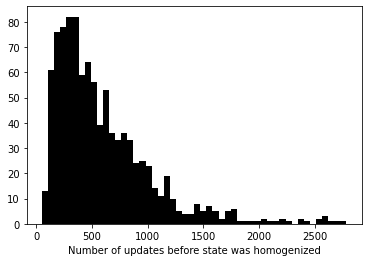

Results for pull updater
Mean is 597.509


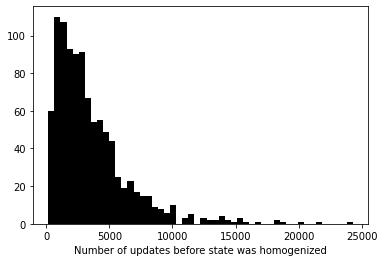

Results for push updater
Mean is 3594.507


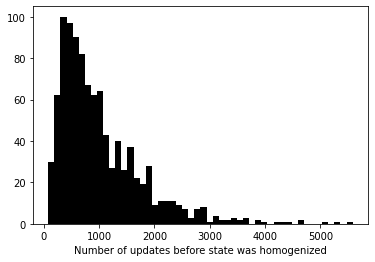

Results for edge updater
Mean is 1025.386


In [52]:
def run_simulation(updater, title, sims=1000):
    results = [run_trial(updater) for _ in range(sims)]
    plot_montecarlo_results(results,title)

#pull information to the first node chosen
run_simulation(pull_updater, "Results for pull updater")

#push information from the first node chosen
run_simulation(push_updater, "Results for push updater")

# choose random between edges
run_simulation(edge_updater, "Results for edge updater")


### What the results tell us.
After running 1000 simulations, the updater function with the highest mean was push (reverse) updated, followed by the edge updater, and ending with the pull updater which was the one with the least amount of steps needed to be homogenized. A reason for these results was that when the node with the highest degree is the speaker, then it means that the nodes that are more connected are quicker to transfer their information. However, if the nodes that are higher connected are the listeners and constantly changing based on inputs from random nodes that might only be connected once, then it leads to slower ways for everyone to reach consensus. The edges updates does not have the extreme bias of the other two given that even if it chooses the ones that have the most edges (e.g. more likely to have their edge picked), whether they are the receiver or the emitter is also 50% - 50%.